In [133]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [134]:
df_cal = pd.read_csv('calendar.csv')
df_cal.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,138619,2019-03-06,f,$160.00,$160.00,30,30
1,958,2019-03-06,f,$158.00,$158.00,1,30
2,958,2019-03-07,f,$158.00,$158.00,1,30
3,958,2019-03-08,f,$156.00,$156.00,1,30
4,958,2019-03-09,f,$154.00,$154.00,1,30


In [135]:
df_cal['available'] = df_cal['available'].map({'t': 1, 'f': 0})
df_cal = df_cal.astype({'date': 'datetime64'})
df_cal['price'] = df_cal['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
df_cal.drop(['adjusted_price'], axis=1, inplace=True)
df_cal.index = df_cal['date']
df_cal.head(5)

,listing_id,date,available,price,minimum_nights,maximum_nights
date,,,,,,
2019-03-06,138619,2019-03-06,0,160.0,30,30
2019-03-06,958,2019-03-06,0,158.0,1,30
2019-03-07,958,2019-03-07,0,158.0,1,30
2019-03-08,958,2019-03-08,0,156.0,1,30
2019-03-09,958,2019-03-09,0,154.0,1,30


In [136]:
pivot_cal = df_cal.pivot_table(index=pd.Grouper(freq='M'), values=['available', 'price'])
print(pivot_cal)

            available       price
date                             
2019-03-31   0.272937  214.895141
2019-04-30   0.434867  216.632340
2019-05-31   0.505839  221.264935
2019-06-30   0.429642  224.945998
2019-07-31   0.434994  231.307897
2019-08-31   0.468010  234.019397
2019-09-30   0.391796  234.792789
2019-10-31   0.402186  231.624668
2019-11-30   0.410940  233.115182
2019-12-31   0.378851  226.109978
2020-01-31   0.389379  230.721194
2020-02-29   0.396385  228.805906
2020-03-31   0.398266  226.708782


In [137]:
pivot_cal.reset_index(inplace=True)
print(pivot_cal)

         date  available       price
0  2019-03-31   0.272937  214.895141
1  2019-04-30   0.434867  216.632340
2  2019-05-31   0.505839  221.264935
3  2019-06-30   0.429642  224.945998
4  2019-07-31   0.434994  231.307897
5  2019-08-31   0.468010  234.019397
6  2019-09-30   0.391796  234.792789
7  2019-10-31   0.402186  231.624668
8  2019-11-30   0.410940  233.115182
9  2019-12-31   0.378851  226.109978
10 2020-01-31   0.389379  230.721194
11 2020-02-29   0.396385  228.805906
12 2020-03-31   0.398266  226.708782


Text(0.5, 0, 'Year-Month-Day')

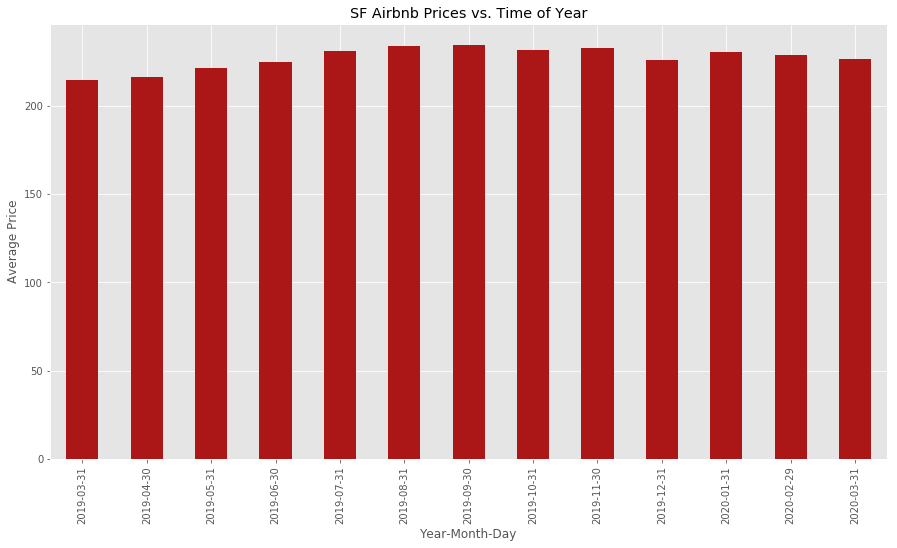

In [138]:
pivot_cal['date']=pivot_cal['date'].astype(str)

matplotlib.style.use('ggplot')
pivot_cal.plot(kind='bar', 
           x='date',
           y='price',
           color = '#AB1717', 
           figsize =(15,8), 
           title = 'SF Airbnb Prices vs. Time of Year', 
           legend = False)
plt.ylabel('Average Price')
plt.xlabel('Year-Month-Day')

Text(0.5, 0, 'Year-Month-Day')

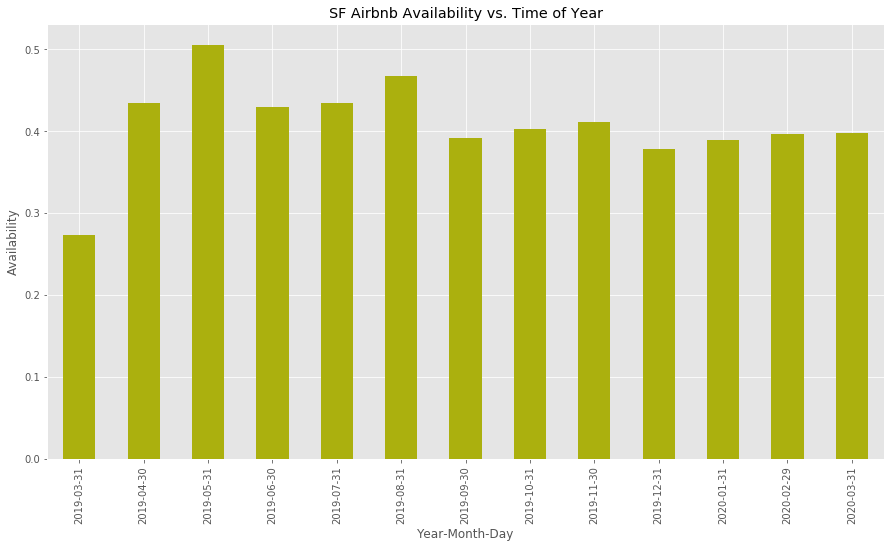

In [139]:
pivot_cal['date']=pivot_cal['date'].astype(str)

matplotlib.style.use('ggplot')
pivot_cal.plot(kind='bar', 
           x='date',
           y='available',
           color = '#ABB00E', 
           figsize =(15,8), 
           title = 'SF Airbnb Availability vs. Time of Year', 
           legend = False)
plt.ylabel('Availability')
plt.xlabel('Year-Month-Day')